In [31]:
import sys
import os
sys.path.append(sys.path[0]+'/../../')
from functions import *
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from math import *
from datetime import datetime
import datetime as dt
from brokenaxes import brokenaxes
from matplotlib.dates import DateFormatter, DayLocator
errors=np.load(sys.path[0]+'/../NMRDataFits/FitsInRangeErrors.npy')

In [32]:
Hsorted_dates21p2=np.load('H2SortedDatesCorrected1p2.npy',allow_pickle=True)
H21p2=np.load('H2CorrectedDSNMR1p2.npy',allow_pickle=True)

Hsorted_dates25=np.load('H2SortedDatesCorrected5.npy',allow_pickle=True)
H25=np.load('H2CorrectedDSNMR5.npy',allow_pickle=True)

Wsorted_dates=np.load('WSortedDatesCorrected.npy',allow_pickle=True)
W=np.load('WCorrectedDSNMR.npy',allow_pickle=True)

Hsorted_dates=np.load('H3SortedDatesCorrected.npy',allow_pickle=True)
H=np.load('H3CorrectedDSNMR.npy',allow_pickle=True)

Fsorted_dates=np.load('FSortedDatesCorrected.npy',allow_pickle=True)
F=np.load('FCorrectedDSNMR.npy',allow_pickle=True)

Dsorted_dates=np.load('DSortedDatesCorrected.npy',allow_pickle=True)
D=np.load('DCorrectedDSNMR.npy',allow_pickle=True)

Csorted_dates=np.load('CSortedDatesCorrected.npy',allow_pickle=True)
C=np.load('CCorrectedDSNMR.npy',allow_pickle=True)

Psorted_dates=np.load('PSortedDatesCorrected.npy',allow_pickle=True)
P=np.load('PCorrectedDSNMR.npy',allow_pickle=True)
PE=.05*P

In [33]:
np.sort(H21p2)[-10:]

array([28.56174555, 34.56296491, 34.75983451, 34.8268198 , 35.38541089,
       35.88318708, 36.33354767, 37.04157625, 37.27485483, 39.16301743])

In [34]:
np.sort(H25)[-10:]

array([42.27603647, 42.66791784, 43.48251072, 43.55778686, 44.03511971,
       44.25172694, 44.35578881, 44.63711185, 45.15711597, 46.08619724])

In [35]:
np.sort(W)[-10:]

array([46.99033257, 47.01010015, 47.03594048, 47.21019086, 47.52359554,
       48.22650734, 49.0410104 , 49.07112319, 49.58317373, 49.80315916])

In [36]:
np.sort(H)[-10:]

array([43.99656283, 44.01064764, 44.04626746, 44.19504233, 44.22035242,
       44.30797492, 44.45919074, 45.87837103, 46.31547044, 56.02932278])

In [37]:
np.sort(F)[-10:]

array([54.17494686, 54.30877016, 54.31168612, 54.34333967, 54.54765948,
       54.57275725, 54.79292821, 54.90208189, 55.68889131, 55.9256795 ])

In [38]:
np.sort(D)[-20:]

array([42.05622394, 42.11659762, 42.12878968, 42.19653838, 42.20742906,
       42.33380805, 42.36118659, 42.47438321, 42.54829532, 42.54864336,
       42.60312986, 42.81423312, 42.97529085, 43.13214855, 43.47115979,
       44.48507913, 59.36739856, 65.3790518 , 66.34326333, 71.57095244])

In [39]:
np.sort(C)[-20:]

array([43.03587831, 43.22734495, 43.31776028, 43.32017048, 43.35023598,
       43.45666221, 43.57663991, 44.00772823, 44.07467451, 44.13655285,
       44.15017597, 44.35601422, 44.61585657, 45.20504415, 45.55637621,
       45.56696298, 48.83100939, 64.04917625, 64.74548938, 67.67621539])

# Bring in pc,ds, and us Errors and match structure to fit arrays

In [40]:
error=errors[0].astype(int).astype(str)
datetimeErrors=[datetime.strptime(date,"%Y%m%d%H%M%S") for date in error]

timestampsE = np.array([d.timestamp() for d in datetimeErrors])
timestampsH21p2 = np.array([d.timestamp() for d in Hsorted_dates21p2])
timestampsH25 = np.array([d.timestamp() for d in Hsorted_dates25])

timestampsH = np.array([d.timestamp() for d in Hsorted_dates])
timestampsW = np.array([d.timestamp() for d in Wsorted_dates])
timestampsF = np.array([d.timestamp() for d in Fsorted_dates])

timestampsD = np.array([d.timestamp() for d in Dsorted_dates])
timestampsC = np.array([d.timestamp() for d in Csorted_dates])

sortingIndicesH21p2=np.empty(0)
for i in range(0,len(timestampsH21p2)):
    j=np.where(timestampsE==timestampsH21p2[i])
    sortingIndicesH21p2=np.append(sortingIndicesH21p2,j).astype(int)

sortingIndicesH25=np.empty(0)
for i in range(0,len(timestampsH25)):
    j=np.where(timestampsE==timestampsH25[i])
    sortingIndicesH25=np.append(sortingIndicesH25,j).astype(int)
    
sortingIndicesH=np.empty(0)
for i in range(0,len(timestampsH)):
    j=np.where(timestampsE==timestampsH[i])
    sortingIndicesH=np.append(sortingIndicesH,j).astype(int)
    
sortingIndicesW=np.empty(0)
for i in range(0,len(timestampsW)):
    j=np.where(timestampsE==timestampsW[i])
    sortingIndicesW=np.append(sortingIndicesW,j).astype(int)
    
sortingIndicesF=np.empty(0)
for i in range(0,len(timestampsF)):
    j=np.where(timestampsE==timestampsF[i])
    sortingIndicesF=np.append(sortingIndicesF,j).astype(int)
    
sortingIndicesD=np.empty(0)
for i in range(0,len(timestampsD)):
    j=np.where(timestampsE==timestampsD[i])
    sortingIndicesD=np.append(sortingIndicesD,j).astype(int)
    
sortingIndicesC=np.empty(0)
for i in range(0,len(timestampsC)):
    j=np.where(timestampsE==timestampsC[i])
    sortingIndicesC=np.append(sortingIndicesC,j).astype(int)

#sortedErrorH2=[datetime.strptime(date,"%Y%m%d%H%M%S") for date in error[sortingIndicesH2]]
#sortedErrorH=[datetime.strptime(date,"%Y%m%d%H%M%S") for date in error[sortingIndicesH]]
#sortedErrorW=[datetime.strptime(date,"%Y%m%d%H%M%S") for date in error[sortingIndicesW]]
#sortedErrorF=[datetime.strptime(date,"%Y%m%d%H%M%S") for date in error[sortingIndicesF]]

sortedErrorH21p2=errors[2][sortingIndicesH21p2]
sortedErrorH2_pc1p2=errors[1][sortingIndicesH21p2]
sortedErrorH21p2=np.nan_to_num(sortedErrorH21p2,5)
sortedErrorH21p2[np.where(sortedErrorH21p2>10)]=5
sortedErrorH2_pc1p2=np.nan_to_num(sortedErrorH2_pc1p2,5)
sortedErrorH2_pc1p2[np.where(sortedErrorH2_pc1p2>10)]=5

sortedErrorH25=errors[2][sortingIndicesH25]
sortedErrorH2_pc5=errors[1][sortingIndicesH25]
sortedErrorH25=np.nan_to_num(sortedErrorH25,5)
sortedErrorH25[np.where(sortedErrorH25>10)]=5
sortedErrorH2_pc5=np.nan_to_num(sortedErrorH2_pc5,5)
sortedErrorH2_pc5[np.where(sortedErrorH2_pc5>10)]=5

sortedErrorF=errors[2][sortingIndicesF]
sortedErrorF_pc=errors[1][sortingIndicesF]

sortedErrorW=errors[2][sortingIndicesW]
sortedErrorW_pc=errors[1][sortingIndicesW]
sortedErrorW=np.nan_to_num(sortedErrorW,5)
sortedErrorW[np.where(sortedErrorW>10)]=5
sortedErrorW_pc=np.nan_to_num(sortedErrorW_pc,5)
sortedErrorW_pc[np.where(sortedErrorW_pc>10)]=5

sortedErrorH=errors[2][sortingIndicesH]
sortedErrorH_pc=errors[1][sortingIndicesH]

sortedErrorH=np.nan_to_num(sortedErrorH,5)
sortedErrorH[np.where(sortedErrorH>10)]=5

sortedErrorD=errors[2][sortingIndicesD]
sortedErrorD_pc=errors[1][sortingIndicesD]

sortedErrorC=errors[2][sortingIndicesC]
sortedErrorC_pc=errors[1][sortingIndicesC]

# Bring in density corrected errors

### Standard deviation

In [41]:
from math import *

In [42]:
#H2
EPRdsE_H21p2=float(np.loadtxt("HunterK2/FinalEPRdsE1p2.txt"))
EPRds_H21p2=float(np.loadtxt("HunterK2/FinalEPRds1p2.txt"))
uncorrectedH21p2=np.load("HunterK2/uncorrected1p2.npy")
newEPRds_H21p2=np.load("HunterK2/newEPRds1p2.npy")
referenceRat_H21p2=float(np.loadtxt("HunterK2/ReferenceRatio1p2.txt"))
sweepRat_H21p2=np.load("HunterK2/sweepRatios1p2.npy")
H2_pc1p2=sweepRat_H21p2*H21p2

EPRdsE_H25=float(np.loadtxt("HunterK2/FinalEPRdsE5.txt"))
EPRds_H25=float(np.loadtxt("HunterK2/FinalEPRds5.txt"))
uncorrectedH25=np.load("HunterK2/uncorrected5.npy")
newEPRds_H25=np.load("HunterK2/newEPRds5.npy")
referenceRat_H25=float(np.loadtxt("HunterK2/ReferenceRatio5.txt"))
sweepRat_H25=np.load("HunterK2/sweepRatios5.npy")
H2_pc5=sweepRat_H25*H25
#W
EPRdsE_W=float(np.loadtxt("Windmill/FinalEPRdsE.txt"))
EPRds_W=float(np.loadtxt("Windmill/FinalEPRds.txt"))
uncorrectedW=np.load("Windmill/uncorrected.npy")
newEPRds_W=np.load("Windmill/newEPRds.npy")
referenceRat_W=float(np.loadtxt("Windmill/ReferenceRatio.txt"))
sweepRat_W=np.load("Windmill/sweepRatios.npy")
W_pc=sweepRat_W*W
#H
EPRdsE_H=float(np.loadtxt("HunterK3/FinalEPRdsE.txt"))
EPRds_H=float(np.loadtxt("HunterK3/FinalEPRds.txt"))
uncorrectedH=np.load("HunterK3/uncorrected.npy")
newEPRds_H=np.load("HunterK3/newEPRds.npy")
referenceRat_H=float(np.loadtxt("HunterK3/ReferenceRatio.txt"))
sweepRat_H=np.load("HunterK3/sweepRatios.npy")
H_pc=sweepRat_H*H

#F
EPRdsE_F=float(np.loadtxt("Fringe/FinalEPRdsE.txt"))
EPRds_F=float(np.loadtxt("Fringe/FinalEPRds.txt"))
uncorrectedF=np.load("Fringe/uncorrected.npy")
newEPRds_F=np.load("Fringe/newEPRds.npy")
referenceRat_F=float(np.loadtxt("Fringe/ReferenceRatio.txt"))
sweepRat_F=np.load("Fringe/sweepRatios.npy")
F_pc=sweepRat_F*F

#D
EPRdsE_D=float(np.loadtxt("Donya/FinalEPRdsE.txt"))
EPRds_D=float(np.loadtxt("Donya/FinalEPRds.txt"))
uncorrectedD=np.load("Donya/uncorrected.npy")
newEPRds_D=np.load("Donya/newEPRds.npy")
referenceRat_D=float(np.loadtxt("Donya/ReferenceRatio.txt"))
sweepRat_D=np.load("Donya/sweepRatios.npy")
D_pc=sweepRat_D*D

#C
EPRdsE_C=float(np.loadtxt("Christin/FinalEPRdsE.txt"))
EPRds_C=float(np.loadtxt("Christin/FinalEPRds.txt"))
uncorrectedC=np.load("Christin/uncorrected.npy")
newEPRds_C=np.load("Christin/newEPRds.npy")
referenceRat_C=float(np.loadtxt("Christin/ReferenceRatio.txt"))
sweepRat_C=np.load("Christin/sweepRatios.npy")
C_pc=sweepRat_C*C



#Standard Error
EPRdsE_H21p2=EPRdsE_H21p2/sqrt(11)
EPRdsE_H25=EPRdsE_H25/sqrt(8)
EPRdsE_W=EPRdsE_W/sqrt(6)
EPRdsE_H=EPRdsE_H/sqrt(10)
EPRdsE_F=EPRdsE_F/sqrt(10)
EPRdsE_D=EPRdsE_D/sqrt(3)
EPRdsE_C=EPRdsE_C/sqrt(4)

### Standard Error

Number of Calibrations
_______________________

Hk21p2 11
Hk25 8
Windmill 6
Hk3 10
Fringe 10

In [43]:
#function to make error propagation simpler
def E(x,y,ex,ey,o):
    if (o=='m'):
        z=x*y
        ez=z*((ex/x)**2+(ey/y)**2)**(.5)
    elif (o=='d'):
        z=x/y
        ez=z*((ex/x)**2+(ey/y)**2)**(.5)
    elif (o=='a'):
        z=x+y
        ez=((ex/x)**2+(ey/y)**2)**(.5)
    elif (o=='s'):   
        z=x-y
        ez=((ex/x)**2+(ey/y)**2)**(.5)
    return(np.array(z),np.array(ez))

### First Calculate sweep ratio error

In [44]:
sweepRatE_H21p2=sweepRat_H21p2*((sortedErrorH2_pc1p2/H2_pc1p2)**2+(sortedErrorH21p2/H21p2)**2)**(.5)
sweepRatE_H25=sweepRat_H25*((sortedErrorH2_pc5/H2_pc5)**2+(sortedErrorH25/H25)**2)**(.5)


sweepRatE_W=sweepRat_W*((sortedErrorW_pc/W_pc)**2+(sortedErrorW/W)**2)**(.5)
sweepRatE_H=sweepRat_H*((sortedErrorH_pc/H_pc)**2+(sortedErrorH/H)**2)**(.5)
sweepRatE_F=sweepRat_F*((sortedErrorF_pc/F_pc)**2+(sortedErrorF/F)**2)**(.5)

sweepRatE_D=sweepRat_D*((sortedErrorD_pc/D_pc)**2+(sortedErrorD/D)**2)**(.5)
sweepRatE_C=sweepRat_C*((sortedErrorC_pc/C_pc)**2+(sortedErrorC/C)**2)**(.5)





### Calculate newEPRdsE

In [45]:
#newEPRdsE_H2

In [46]:
newEPRdsE_H21p2=newEPRds_H21p2*((EPRdsE_H21p2/EPRds_H21p2)**2+(sweepRatE_H21p2/sweepRat_H21p2)**2)**(.5)
newEPRdsE_H25=newEPRds_H25*((EPRdsE_H25/EPRds_H25)**2+(sweepRatE_H25/sweepRat_H25)**2)**(.5)

newEPRdsE_W=newEPRds_W*((EPRdsE_W/EPRds_W)**2+(sweepRatE_W/sweepRat_W)**2)**(.5)
newEPRdsE_H=newEPRds_H*((EPRdsE_H/EPRds_H)**2+(sweepRatE_H/sweepRat_H)**2)**(.5)
newEPRdsE_F=newEPRds_F*((EPRdsE_F/EPRds_F)**2+(sweepRatE_F/sweepRat_F)**2)**(.5)

newEPRdsE_D=newEPRds_D*((EPRdsE_D/EPRds_D)**2+(sweepRatE_D/sweepRat_D)**2)**(.5)
newEPRdsE_C=newEPRds_C*((EPRdsE_C/EPRds_C)**2+(sweepRatE_C/sweepRat_C)**2)**(.5)





### Calculate the Error for each corrected NMR

In [47]:
r1=np.empty(0)
r2=np.empty(0)
r3=np.empty(0)
r4=np.empty(0)
r5=np.empty(0)
r6=np.empty(0)
r7=np.empty(0)




H2E1p2=H21p2*((newEPRdsE_H21p2/newEPRds_H21p2)**2+(sortedErrorH21p2/uncorrectedH21p2)**2)**(.5)
percentH21p2=100*H2E1p2/H21p2
for i,j in enumerate(percentH21p2):
    if j>10:
        percentH21p2[i]=10
        r1=np.append(r1,i)
        
H2E5=H25*((newEPRdsE_H25/newEPRds_H25)**2+(sortedErrorH25/uncorrectedH25)**2)**(.5)
percentH25=100*H2E5/H25
for i,j in enumerate(percentH25):
    if j>10:
        percentH25[i]=10
        r2=np.append(r2,i)

        
WE=W*((newEPRdsE_W/newEPRds_W)**2+(sortedErrorW/uncorrectedW)**2)**(.5)
percentW=100*WE/W
for i,j in enumerate(percentW):
    if j>10:
        percentW[i]=10
        r3=np.append(r3,i)
        
        
HE=H*((newEPRdsE_H/newEPRds_H)**2+(sortedErrorH/uncorrectedH)**2)**(.5)
percentH=100*HE/H
for i,j in enumerate(percentH):
    if j>10:
        percentH[i]=10
        r4=np.append(r4,i)
        
        
FE=F*((newEPRdsE_F/newEPRds_F)**2+(sortedErrorF/uncorrectedF)**2)**(.5)
percentF=100*FE/F
for i,j in enumerate(percentF):
    if j>10:
        percentF[i]=10
        r5=np.append(r5,i)
        
        
DE=D*((newEPRdsE_D/newEPRds_D)**2+(sortedErrorD/uncorrectedD)**2)**(.5)
percentD=100*DE/D
for i,j in enumerate(percentD):
    if j>10:
        percentD[i]=10
        r6=np.append(r6,i)
        
        
CE=C*((newEPRdsE_C/newEPRds_C)**2+(sortedErrorC/uncorrectedC)**2)**(.5)
percentC=100*CE/C
for i,j in enumerate(percentC):
    if j>10:
        percentC[i]=10
        r7=np.append(r7,i)
        

#removing points with error too high
percentH21p2=np.delete(percentH21p2,r1.astype(int))
percentH25=np.delete(percentH25,r2.astype(int))
percentW=np.delete(percentW,r3.astype(int))
percentH=np.delete(percentH,r4.astype(int))
percentF=np.delete(percentF,r5.astype(int))
percentD=np.delete(percentD,r6.astype(int))
percentC=np.delete(percentC,r7.astype(int))


Hsorted_dates21p2R=np.delete(Hsorted_dates21p2,r1.astype(int))
Hsorted_dates25R=np.delete(Hsorted_dates25,r2.astype(int))
Wsorted_datesR=np.delete(Wsorted_dates,r3.astype(int))
Hsorted_datesR=np.delete(Hsorted_dates,r4.astype(int))
Fsorted_datesR=np.delete(Fsorted_dates,r5.astype(int))
Dsorted_datesR=np.delete(Dsorted_dates,r6.astype(int))
Csorted_datesR=np.delete(Csorted_dates,r7.astype(int))


In [48]:
len(percentH21p2)

30

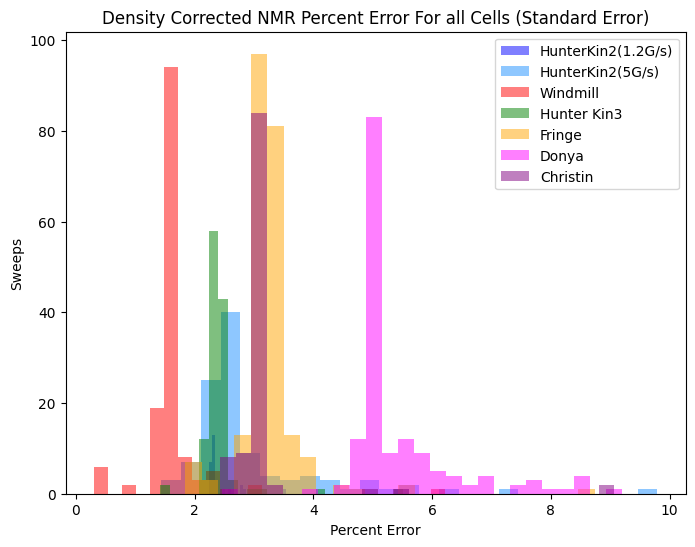

In [49]:
plt.figure(figsize=(8,6))
b=plt.hist(percentH21p2,bins=25,alpha=.5,label="HunterKin2(1.2G/s)",color='blue')
b=plt.hist(percentH25,bins=25,alpha=.5,label="HunterKin2(5G/s)",color='dodgerblue')

b=plt.hist(percentW,bins=25,alpha=.5,label="Windmill",color='red')
b=plt.hist(percentH,bins=25,alpha=.5,label="Hunter Kin3",color='green')
b=plt.hist(percentF,bins=25,alpha=.5,label="Fringe",color='orange')

b=plt.hist(percentD,bins=25,alpha=.5,label="Donya",color='magenta')
b=plt.hist(percentC,bins=25,alpha=.5,label="Christin",color='purple')


plt.title("Density Corrected NMR Percent Error For all Cells (Standard Error)")
plt.ylabel("Sweeps")
plt.xlabel("Percent Error")
plt.legend(loc='upper right')
plt.savefig("DensityCorrectedNMRErrors")

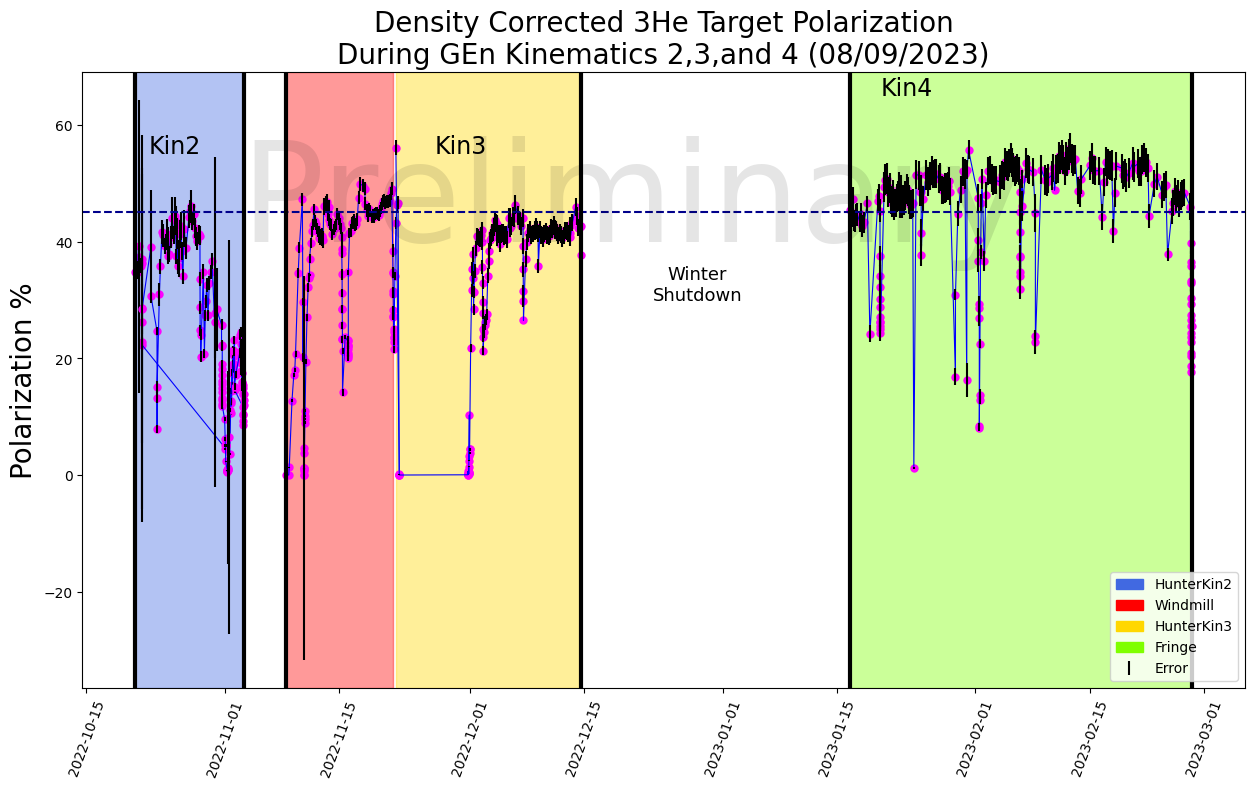

In [50]:
#Had to make two subplots in order to fit everything on to one plot

#f, (ax, ax2) = plt.subplots(1, 2, sharey=True, facecolor='w',figsize=(15,8))


plt.figure(figsize=(15,8))
#baxes = brokenaxes(xlims=((0,8),(12,20)))

m=10
l=.8
e=1.5


plt.plot(Hsorted_dates21p2,H21p2,'.',color='magenta',markersize=m)
plt.plot(Hsorted_dates21p2,H21p2,'-',color='blue',linewidth=l)
plt.errorbar(Hsorted_dates21p2,H21p2,yerr=H2E1p2*1.5,color='black',linewidth=e,ls='None',label='Error')

plt.plot(Hsorted_dates25,H25,'.',color='magenta',markersize=m)
plt.plot(Hsorted_dates25,H25,'-',color='blue',linewidth=l)
plt.errorbar(Hsorted_dates25,H25,yerr=H2E5*1.5,color='black',linewidth=e,ls='None')

plt.plot(Wsorted_dates,W,'.',color='magenta',markersize=m)
plt.plot(Wsorted_dates,W,'-',color='blue',linewidth=l)
plt.errorbar(Wsorted_dates,W,yerr=WE*1.5,color='black',linewidth=e,ls='None')


plt.plot(Hsorted_dates,H,'.',color='magenta',markersize=m)
plt.plot(Hsorted_dates,H,'-',color='blue',linewidth=l)
plt.errorbar(Hsorted_dates,H,yerr=HE*1.5,color='black',linewidth=e,ls='None')


plt.plot(Fsorted_dates,F,'.',color='magenta',markersize=m)
plt.plot(Fsorted_dates,F,'-',color='blue',linewidth=l)
plt.errorbar(Fsorted_dates,F,yerr=FE*1.5,color='black',linewidth=e,ls='None')

#plt.plot(Csorted_dates,C,'.',color='magenta',markersize=m)
#plt.plot(Csorted_dates,C,'-',color='blue',linewidth=l)
#plt.errorbar(Fsorted_dates,F,yerr=FE*1.5,color='black',linewidth=e,ls='None')

x=plt.xticks(rotation=70)
plt.axhline(y = 45, color = 'darkblue', linestyle = '--')
#plt.axhline(y = 60, color = 'darkblue', linestyle = '--')


plt.axvspan(Hsorted_dates21p2[0],Hsorted_dates25[-1:][0],alpha=.4,color='royalblue',label='HunterKin2')
plt.axvline(Hsorted_dates21p2[0],color='black',linewidth='3')
plt.axvline(Hsorted_dates25[-1:][0],color='black',linewidth='3')


plt.axvspan(Wsorted_dates[0],Wsorted_dates[-19:-18][0],alpha=.4,color='red',label='Windmill')
plt.axvspan(Hsorted_dates[0],Hsorted_dates[-1:][0],alpha=.4,color='gold',label='HunterKin3')
plt.axvline(Wsorted_dates[0],color='black',linewidth='3')
plt.axvline(Hsorted_dates[-1:][0],color='black',linewidth='3')

plt.axvspan(Fsorted_dates[0],Fsorted_dates[-1:][0],alpha=.4,color='chartreuse',label='Fringe')
plt.axvline(Fsorted_dates[0],color='black',linewidth='3')
plt.axvline(Fsorted_dates[-1:][0],color='black',linewidth='3')

leg=plt.legend(loc='lower right')
for lh in leg.legendHandles: 
    lh.set_alpha(1)

plt.text(Hsorted_dates25[20],55,'Kin2',fontsize=17,ha='center')
plt.text(Hsorted_dates[50],55,'Kin3',fontsize=17,ha='right')
plt.text(Fsorted_dates[20],65,'Kin4',fontsize=17,ha='left')
plt.text(datetime(2022, 12, 28, 22, 32, 36),30,'Winter'+'\n'+'Shutdown',fontsize=13,ha='center')
plt.text(datetime(2022, 12, 20, 22, 32, 36),40,'Preliminary',fontsize=100,ha='center',alpha=.1)


plt.ylabel('Polarization %',fontsize=20)
plt.title('Density Corrected 3He Target Polarization'+'\n''During GEn Kinematics 2,3,and 4 (08/09/2023)',fontsize=20)
#plt.ylim(20,70)
plt.savefig('DensityCorrectedPolarizationWithErrors.png')

# To include pristine change: width_ratios, preliminary watermark, axvspan,high2

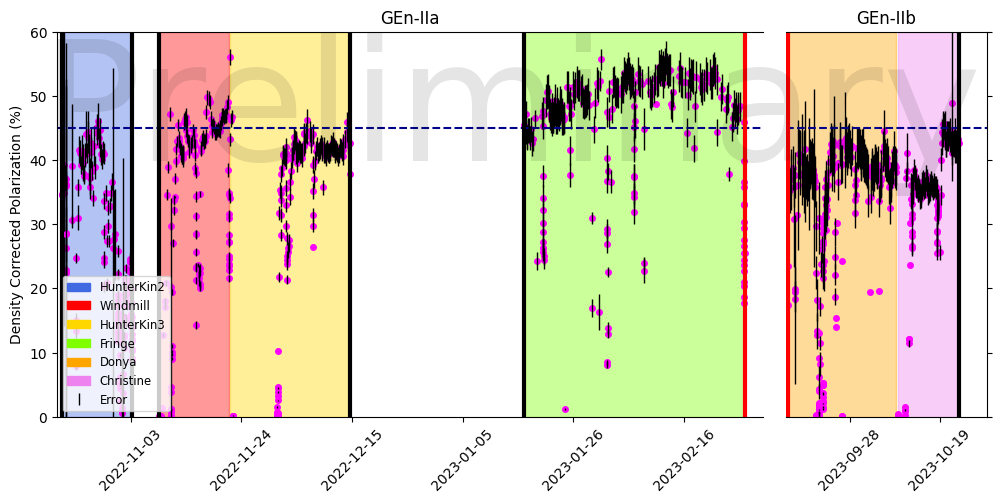

<Figure size 1500x800 with 0 Axes>

In [61]:
#Had to make two subplots in order to fit everything on to one plot

#f, (ax, ax2) = plt.subplots(1, 2, sharey=True, facecolor='w',figsize=(12,4))
width_ratios = [3.51, 1]  # 3/4 for the first plot and 1/4 for the second plot
#width_ratios = [2, 1] # including pristine data
f, (ax, ax2) = plt.subplots(1, 2, sharey=True, facecolor='w', figsize=(12, 5), gridspec_kw={'width_ratios': width_ratios})
#First Half
plt.figure(figsize=(15,8))
#baxes = brokenaxes(xlims=((0,8),(12,20)))

m=8
l=.7
e=1


ax.plot(Hsorted_dates21p2,H21p2,'.',color='magenta',markersize=m)
#ax.plot(Hsorted_dates21p2,H21p2,'-',color='blue',linewidth=l)
ax.errorbar(Hsorted_dates21p2,H21p2,yerr=H2E1p2*1.5,color='black',linewidth=e,ls='None',label='Error')

ax.plot(Hsorted_dates25,H25,'.',color='magenta',markersize=m)
#ax.plot(Hsorted_dates25,H25,'-',color='blue',linewidth=l)
ax.errorbar(Hsorted_dates25,H25,yerr=H2E5*1.5,color='black',linewidth=e,ls='None')

ax.plot(Wsorted_dates,W,'.',color='magenta',markersize=m)
#ax.plot(Wsorted_dates,W,'-',color='blue',linewidth=l)
ax.errorbar(Wsorted_dates,W,yerr=WE*1.5,color='black',linewidth=e,ls='None')


ax.plot(Hsorted_dates,H,'.',color='magenta',markersize=m)
#ax.plot(Hsorted_dates,H,'-',color='blue',linewidth=l)
ax.errorbar(Hsorted_dates,H,yerr=HE*1.5,color='black',linewidth=e,ls='None')


ax.plot(Fsorted_dates,F,'.',color='magenta',markersize=m)
#ax.plot(Fsorted_dates,F,'-',color='blue',linewidth=l)
ax.errorbar(Fsorted_dates,F,yerr=FE*1.5,color='black',linewidth=e,ls='None')

#ax2.plot(Csorted_dates,C,'.',color='magenta',markersize=m)
#ax2.plot(Csorted_dates,C,'-',color='blue',linewidth=l)

#ax2.plot(Dsorted_dates,D,'.',color='magenta',markersize=m)
#ax2.plot(Dsorted_dates,D,'-',color='blue',linewidth=l)

#x=f.xticks(rotation=70)
ax.axhline(y = 45, color = 'darkblue', linestyle = '--')
#plt.axhline(y = 60, color = 'darkblue', linestyle = '--')


ax.axvspan(Hsorted_dates21p2[0],Hsorted_dates25[-1:][0],alpha=.4,color='royalblue',label='HunterKin2')
ax.axvline(Hsorted_dates21p2[0],color='black',linewidth='3')
ax.axvline(Hsorted_dates25[-1:][0],color='black',linewidth='3')


ax.axvspan(Wsorted_dates[0],Wsorted_dates[-19:-18][0],alpha=.4,color='red',label='Windmill')
ax.axvspan(Hsorted_dates[0],Hsorted_dates[-1:][0],alpha=.4,color='gold',label='HunterKin3')
ax.axvline(Wsorted_dates[0],color='black',linewidth='3')
ax.axvline(Hsorted_dates[-1:][0],color='black',linewidth='3')

ax.axvspan(Fsorted_dates[0],Fsorted_dates[-1:][0],alpha=.4,color='chartreuse',label='Fringe')
ax.axvline(Fsorted_dates[0],color='black',linewidth='3')
ax.axvline(Fsorted_dates[-1:][0],color='red',linewidth='3')


ax.axvspan(Dsorted_dates[0],Dsorted_dates[-1:][0],alpha=.4,color='orange',label='Donya')
#ax.axvline(Dsorted_dates[0],color='black',linewidth='3')
#ax2.axvline(Dsorted_dates[-1:][0],color='black',linewidth='3')

ax.axvspan(Csorted_dates[0],Csorted_dates[-1:][0],alpha=.4,color='violet',label='Christine')
#ax2.axvline(Csorted_dates[0],color='black',linewidth='3')
ax.axvline(Csorted_dates[-1:][0],color='black',linewidth='3')



#leg=ax.legend(loc='lower right')
#for lh in leg.legendHandles: 
#    lh.set_alpha(1)

#ax.text(Hsorted_dates25[20],55,'Kin2',fontsize=17,ha='center')
#ax.text(Hsorted_dates[50],55,'Kin3',fontsize=17,ha='right')
#ax.text(Fsorted_dates[20],65,'Kin4',fontsize=17,ha='left')
#ax.text(datetime(2022, 12, 28, 22, 32, 36),30,'Winter'+'\n'+'Shutdown',fontsize=13,ha='center')
#ax.text(datetime(2023, 1, 20, 22, 32, 36),40,'Preliminary',fontsize=100,ha='center',alpha=.1)
ax2.text(datetime(2023, 7, 10, 22, 32, 36),40,'Preliminary',fontsize=120,ha='center',alpha=.1)#including pristine

#ax2.text(datetime(2023, 7, 30, 22, 32, 36),40,'Preliminary',fontsize=120,ha='center',alpha=.1)#including pristine


#ax.ylabel('Polarization %',fontsize=20)
#ax.title('Density Corrected 3He Target Polarization'+'\n''During GEn Kinematics 2,3,and 4 (08/09/2023)',fontsize=20)
#plt.ylim(20,70)
#ax.savefig('DensityCorrectedPolarizationWithErrors.png')


#Second Half
ax2.plot(Hsorted_dates21p2,H21p2,'.',color='magenta',markersize=m)
#ax2.plot(Hsorted_dates21p2,H21p2,'-',color='blue',linewidth=l)
ax2.errorbar(Hsorted_dates21p2,H21p2,yerr=H2E1p2*1.5,color='black',linewidth=e,ls='None',label='Error')

ax2.plot(Hsorted_dates25,H25,'.',color='magenta',markersize=m)
#ax2.plot(Hsorted_dates25,H25,'-',color='blue',linewidth=l)
ax2.errorbar(Hsorted_dates25,H25,yerr=H2E5*1.5,color='black',linewidth=e,ls='None')

ax2.plot(Wsorted_dates,W,'.',color='magenta',markersize=m)
#ax2.plot(Wsorted_dates,W,'-',color='blue',linewidth=l)
ax2.errorbar(Wsorted_dates,W,yerr=WE*1.5,color='black',linewidth=e,ls='None')


ax2.plot(Hsorted_dates,H,'.',color='magenta',markersize=m)
#ax2.plot(Hsorted_dates,H,'-',color='blue',linewidth=l)
ax2.errorbar(Hsorted_dates,H,yerr=HE*1.5,color='black',linewidth=e,ls='None')


ax2.plot(Fsorted_dates,F,'.',color='magenta',markersize=m)
#ax2.plot(Fsorted_dates,F,'-',color='blue',linewidth=l)
ax2.errorbar(Fsorted_dates,F,yerr=FE*1.5,color='black',linewidth=e,ls='None')

Cindices=np.where(C<50)


ax2.plot(Csorted_dates[Cindices],C[Cindices],'.',color='magenta',markersize=m)
#ax2.plot(Csorted_dates,C,'-',color='blue',linewidth=l)
ax2.errorbar(Csorted_dates[Cindices],C[Cindices],yerr=CE[Cindices]*1.5,color='black',linewidth=e,ls='None')


Dindices=np.where(D<50)

ax2.plot(Dsorted_dates[Dindices],D[Dindices],'.',color='magenta',markersize=m)
#ax2.plot(Dsorted_dates,D,'-',color='blue',linewidth=l)
ax2.errorbar(Dsorted_dates[Dindices],D[Dindices],yerr=DE[Dindices]*1.5,color='black',linewidth=e,ls='None')

ax2.plot(Psorted_dates,P,'.',color='magenta',markersize=m)
#ax2.plot(Hsorted_dates,H,'-',color='blue',linewidth=l)
ax2.errorbar(Psorted_dates,P,yerr=abs(PE),color='black',linewidth=e,ls='None')
#ax.axvspan(Psorted_dates[0],Psorted_dates[-1:][0],alpha=.4,color='teal',label='Pristine (ALL)')


#x=f.xticks(rotation=70)
ax2.axhline(y = 45, color = 'darkblue', linestyle = '--')
#plt.axhline(y = 60, color = 'darkblue', linestyle = '--')


ax2.axvspan(Hsorted_dates21p2[0],Hsorted_dates25[-1:][0],alpha=.4,color='royalblue',label='HunterKin2')
ax2.axvline(Hsorted_dates21p2[0],color='black',linewidth='3')
ax2.axvline(Hsorted_dates25[-1:][0],color='black',linewidth='3')


ax2.axvspan(Wsorted_dates[0],Wsorted_dates[-19:-18][0],alpha=.4,color='red',label='Windmill')
ax2.axvspan(Hsorted_dates[0],Hsorted_dates[-1:][0],alpha=.4,color='gold',label='HunterKin3')
ax2.axvline(Wsorted_dates[0],color='black',linewidth='3')
ax2.axvline(Hsorted_dates[-1:][0],color='black',linewidth='3')

ax2.axvspan(Fsorted_dates[0],Fsorted_dates[-1:][0],alpha=.4,color='chartreuse',label='Fringe')
ax2.axvline(Fsorted_dates[0],color='black',linewidth='3')
ax2.axvline(Fsorted_dates[-1:][0],color='black',linewidth='3')

ax2.axvspan(Csorted_dates[0],Csorted_dates[-1:][0],alpha=.4,color='violet',label='Christine')
#ax2.axvline(Csorted_dates[0],color='black',linewidth='3')
ax2.axvline(Csorted_dates[-1:][0],color='black',linewidth='3')

ax2.axvspan(Dsorted_dates[0],Dsorted_dates[-1:][0],alpha=.4,color='orange',label='Donya')
ax2.axvline(Dsorted_dates[0],color='red',linewidth='3')
#ax2.axvline(Dsorted_dates[-1:][0],color='black',linewidth='3')
ax2.axvspan(Psorted_dates[0],Psorted_dates[-1:][0],alpha=.4,color='teal',label='Pristine (ALL)')
ax2.axvline(Psorted_dates[0],color='black',linewidth='3')
ax2.axvline(Psorted_dates[-1:][0],color='black',linewidth='3')

leg=ax.legend(loc='lower left',prop={'size': 'small'})
for lh in leg.legendHandles: 
    lh.set_alpha(1)

#ax2.text(Hsorted_dates25[20],55,'Kin2',fontsize=17,ha='center')
#ax2.text(Hsorted_dates[50],55,'Kin3',fontsize=17,ha='right')
#ax2.text(Fsorted_dates[20],65,'Kin4',fontsize=17,ha='left')
#ax2.text(datetime(2022, 12, 28, 22, 32, 36),30,'Winter'+'\n'+'Shutdown',fontsize=13,ha='center')
#ax2.text(datetime(2022, 12, 20, 22, 32, 36),40,'Preliminary',fontsize=100,ha='center',alpha=.1)

low1=datetime(2022,10,20)
high1=datetime(2023,3,3)
low2=datetime(2023,9,13)
high2=datetime(2023,10,30)
#high2=datetime(2023,11,30)#including pristine

ax.set_xlim(low1, high1)
ax2.set_xlim(low2, high2)

ax.set_ylim(0,60)
ax2.set_ylim(0,60)

date_format = "%Y-%m-%d"
locator = DayLocator(interval=21) 
locator2 = DayLocator(interval=18) 
locator = DayLocator(interval=21) 
locator2 = DayLocator(interval=21) 

formatter = DateFormatter(date_format)

ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

ax2.xaxis.set_major_locator(locator2)
ax2.xaxis.set_major_formatter(formatter)

# Rotate x-axis labels
ax.tick_params(axis='x', labelrotation=45)
ax2.tick_params(axis='x', labelrotation=45)

# hide the spines between ax and ax2
ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax.yaxis.tick_left()
ax.tick_params(labelright='off')
ax2.yaxis.tick_right()
ax.tick_params(labelright=False)

#d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
#kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
#ax.plot((1-d, 1+d), (-d, +d), **kwargs)
#ax.plot((1-d, 1+d), (1-d, 1+d), **kwargs)

#kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
#ax2.plot((-d, +d), (1-d, 1+d), **kwargs)
#ax2.plot((-d, +d), (-d, +d), **kwargs)

ax.set_title("GEn-IIa")
ax.set_ylabel("Density Corrected Polarization (%)")

ax2.set_title("GEn-IIb")

f.subplots_adjust(wspace=.05)

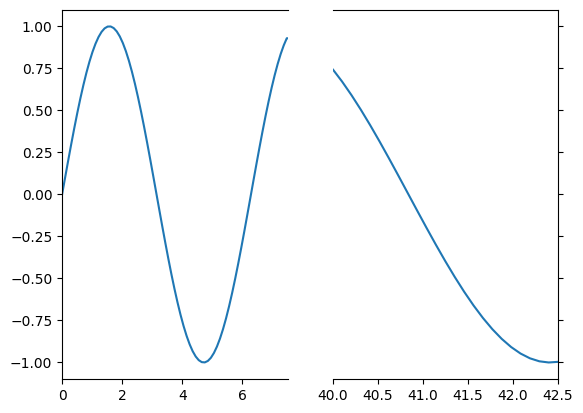

In [52]:

x = np.linspace(0,10,100)
x[75:] = np.linspace(40,42.5,25)

y = np.sin(x)

f, (ax, ax2) = plt.subplots(1, 2, sharey=True, facecolor='w')

# plot the same data on both axes
ax.plot(x, y)
ax2.plot(x, y)

ax.set_xlim(0, 7.5)
ax2.set_xlim(40, 42.5)

# hide the spines between ax and ax2
ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax.yaxis.tick_left()
ax.tick_params(labelright='off')
ax2.yaxis.tick_right()
ax.tick_params(labelright=False)

In [53]:
from functions import *
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from math import *
from copy import deepcopy
from datetime import datetime

import csv

# Open the CSV file
with open('chart.csv', 'r') as file:
  # Read the CSV file
  reader = csv.reader(file)

  # Create an empty list to store the data
  tcdata = []

  # Loop through the rows in the CSV file
  for row in reader:
    # Add the row to the data list
    tcdata.append(row)

In [54]:
x=np.empty(0)
x=np.transpose(np.array(tcdata[2:]))
y=np.array(x[0][0])

In [55]:
len(x[0])

229981

In [56]:
#y=np.empty
#for i in x[0]:
 #   print(i)
 #   y=np.append(y,i[:19])

In [57]:
#new=y[1:]

In [58]:
#curDate=[datetime.strptime(date,"%Y-%m-%dT%H:%M:%S") for date in new]


In [59]:
#plt.figure(figsize=(12,4))
#plt.plot(curDate,x[1].astype(float),linewidth=.2,alpha=.8)
#plt.xticks(rotation=70)

#plt.title("Beam Current")
#plt.ylabel("Current(uA)")

# Include Pristine Data for Progress report

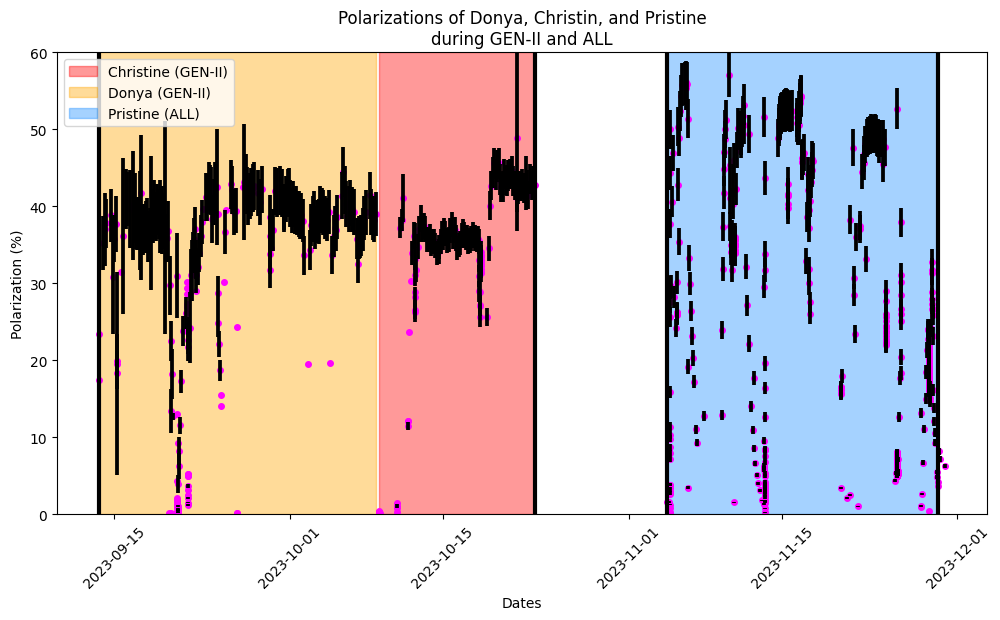

In [60]:
plt.figure(figsize=(12,6))
for i in range(0,len(DE)):
    if(DE[i]>10):
        DE[i]=5
m=8
Cindices=np.where(C<50)


plt.plot(Csorted_dates[Cindices],C[Cindices],'.',color='magenta',markersize=m)
#ax2.plot(Csorted_dates,C,'-',color='blue',linewidth=l)
plt.errorbar(Csorted_dates[Cindices],C[Cindices],yerr=CE[Cindices]*1.5,color='black',linewidth=e,ls='None')


Dindices=np.where(D<50)

plt.plot(Dsorted_dates[Dindices],D[Dindices],'.',color='magenta',markersize=m)
#ax2.plot(Dsorted_dates,D,'-',color='blue',linewidth=l)
plt.errorbar(Dsorted_dates[Dindices],D[Dindices],yerr=DE[Dindices]*1.5,color='black',linewidth=e,ls='None')

plt.plot(Psorted_dates,P,'.',color='magenta',markersize=m)
#ax2.plot(Hsorted_dates,H,'-',color='blue',linewidth=l)
plt.errorbar(Psorted_dates,P,yerr=abs(PE),color='black',linewidth=e,ls='None')


plt.axvspan(Csorted_dates[0],Csorted_dates[-1:][0],alpha=.4,color='red',label='Christine (GEN-II)')
#ax2.axvline(Csorted_dates[0],color='black',linewidth='3')
plt.axvline(Csorted_dates[-1:][0],color='black',linewidth='3')

plt.axvspan(Dsorted_dates[0],Dsorted_dates[-1:][0],alpha=.4,color='orange',label='Donya (GEN-II)')
plt.axvline(Dsorted_dates[0],color='black',linewidth='3')
#ax2.axvline(Dsorted_dates[-1:][0],color='black',linewidth='3')

plt.axvspan(Psorted_dates[0],Psorted_dates[-1:][0],alpha=.4,color='dodgerblue',label='Pristine (ALL)')
plt.axvline(Psorted_dates[0],color='black',linewidth='3')
plt.axvline(Psorted_dates[-1:][0],color='black',linewidth='3')

plt.ylim(0,60)
plt.title('Polarizations of Donya, Christin, and Pristine' '\n' 'during GEN-II and ALL')
plt.xticks(rotation=45)
plt.ylabel('Polarization (%)')
plt.xlabel('Dates')
plt.legend(loc='upper left')